# **Data Visualization**


In this particular assignment we will be focusing on the visualization of data. I used SQL queries to extract the data.


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


Downloaded database file.


In [3]:
import requests 

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"

response=requests.get(url)

#Save the content into a file
with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)

Connect to the database.


In [6]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # To open a database connection

Import pandas module.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing distribution of data


### Histograms


histogram of `ConvertedComp.`


In [8]:
#query to select all columns from master table
QUERY =  """
SELECT * FROM master
"""

# created a datframe out of result
df = pd.read_sql_query(QUERY, conn) 

In [9]:
df['ConvertedComp'].head(40)

0       61000.0
1       95179.0
2       90000.0
3      455352.0
4       65277.0
5       31140.0
6       41244.0
7      103000.0
8       69000.0
9       26388.0
10       6300.0
11     114000.0
12     100000.0
13    1100000.0
14      51312.0
15     156000.0
16      20623.0
17      87996.0
18      60000.0
19       5597.0
20      47300.0
21      68268.0
22      51150.0
23      97389.0
24     107000.0
25      66000.0
26      87994.0
27      36265.0
28      11194.0
29      75000.0
30       4128.0
31     114575.0
32      17491.0
33      39254.0
34       7696.0
35          NaN
36     117540.0
37       3468.0
38      16008.0
39      36060.0
Name: ConvertedComp, dtype: float64

In [12]:
# defining a function to replace Nan values with mean
def replace_nan_with_mean(df, column_name):
    mean_value = df[column_name].astype("float").mean(axis=0)
    df.replace({column_name:np.nan}, mean_value, inplace=True)
    return df

In [13]:
df.replace('', np.nan, inplace=True)    # replaced empty cell with nan 
df = replace_nan_with_mean(df, 'ConvertedComp')

df['ConvertedComp'] = df['ConvertedComp'].astype(int)   # converted the column values into int type

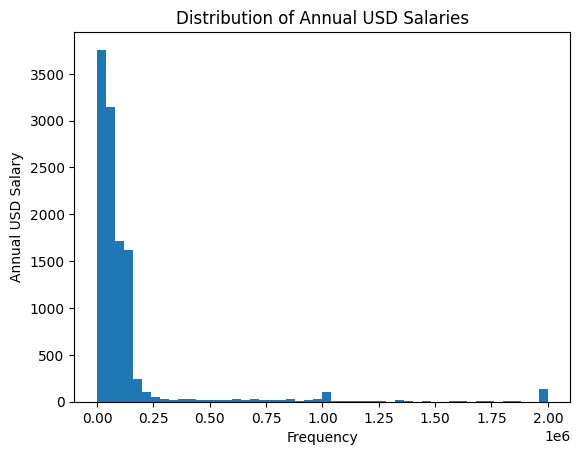

In [15]:
# plot histogram
plt.hist(df['ConvertedComp'], bins=50)
plt.ylabel('Annual USD Salary')
plt.xlabel('Frequency')
plt.title('Distribution of Annual USD Salaries')
plt.show()

### Box Plots


box plot of `Age.`


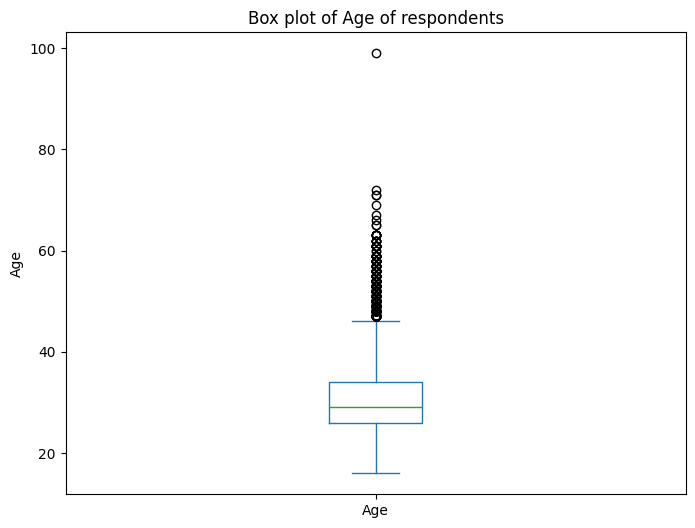

In [16]:

df = replace_nan_with_mean(df, 'Age')

df['Age'] = df['Age'].astype(int)

# Plot Box plot
df['Age'].plot(kind='box', figsize=(8,6))
plt.title('Box plot of Age of respondents')
plt.ylabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


scatter plot of `Age` and `WorkWeekHrs.`


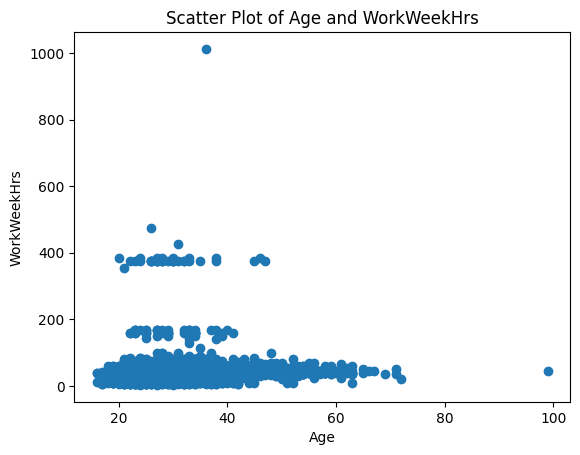

In [17]:
# your code goes here
df = replace_nan_with_mean(df, 'WorkWeekHrs')

df['WorkWeekHrs'] = df['WorkWeekHrs'].astype(int)
plt.scatter(df['Age'], df['WorkWeekHrs'])

# add title and labels
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

# show the plot
plt.show()

### Bubble Plots


bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


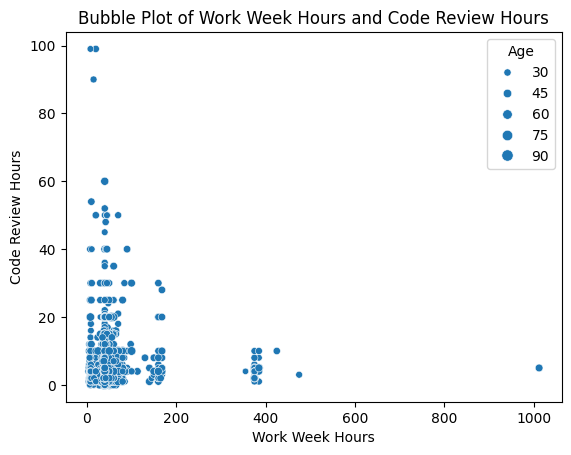

In [18]:
df = replace_nan_with_mean(df, 'CodeRevHrs')

df['CodeRevHrs'] = df['CodeRevHrs'].astype(int)

#Scatter Plot
sns.scatterplot(x=df['WorkWeekHrs'], y=df['CodeRevHrs'], size=df['Age'], data=df)

plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot of Work Week Hours and Code Review Hours')

plt.show()

## Visualizing composition of data


### Pie Charts


a pie chart of the top 5 databases that respondents wish to learn next year.


In [19]:
# query to select DatabaseDesiredNextYear table
QUERY =  """
SELECT * FROM DatabaseDesireNextYear
"""
df1 = pd.read_sql_query(QUERY, conn) # created new dataframe to store queried result

In [20]:
# grouped all columns based on DatabaseDesiredNextYear column
# assigned the result to a new dataframe
df_DB = df1.groupby('DatabaseDesireNextYear', axis=0).sum() 
df_DB.head(20)

C:\Users\ACER\AppData\Local\Temp\ipykernel_2176\1700186815.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_DB = df1.groupby('DatabaseDesireNextYear', axis=0).sum()


,Respondent
DatabaseDesireNextYear,
Cassandra,12330710
Couchbase,4683527
DynamoDB,12995539
Elasticsearch,35314757
Firebase,20585232
MariaDB,17280016
Microsoft SQL Server,33649369
MongoDB,45897489
MySQL,41353217


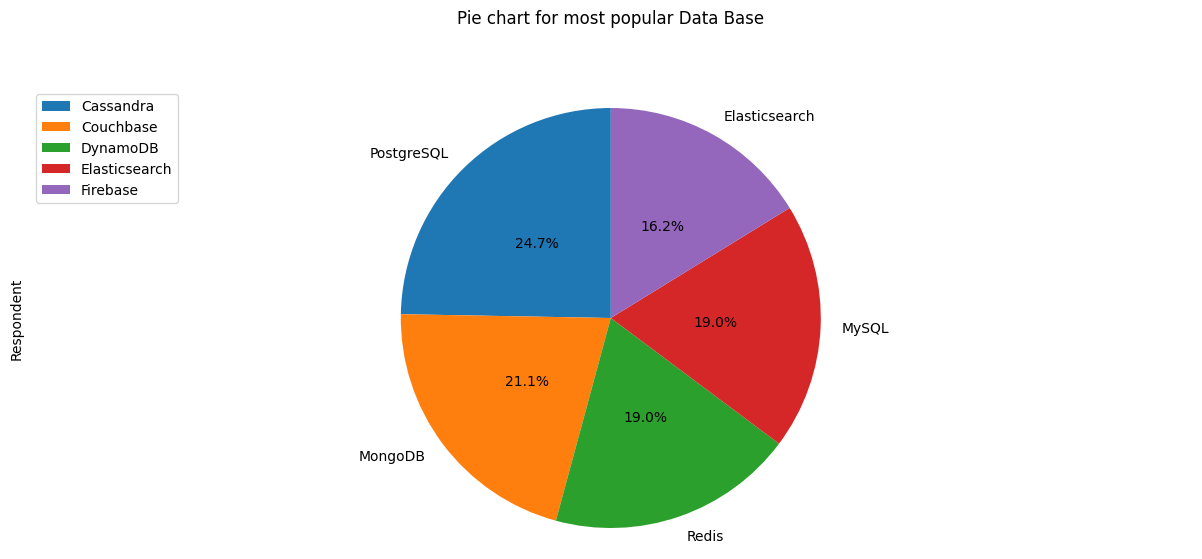

In [21]:
top = df_DB.nlargest(5, 'Respondent') # extracts the top 5 rows from the DataFrame df_DB based on the column Respondent.

# Pie chart
top['Respondent'].plot(kind='pie',
                         figsize=(15, 6),
                         autopct='%1.1f%%',
                         startangle=90,
                         pctdistance=0.5)

plt.title('Pie chart for most popular Data Base', y=1.12)
plt.axis('equal')


plt.legend(labels=df_DB.index, loc='upper left')


plt.show()

### Stacked Charts


stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


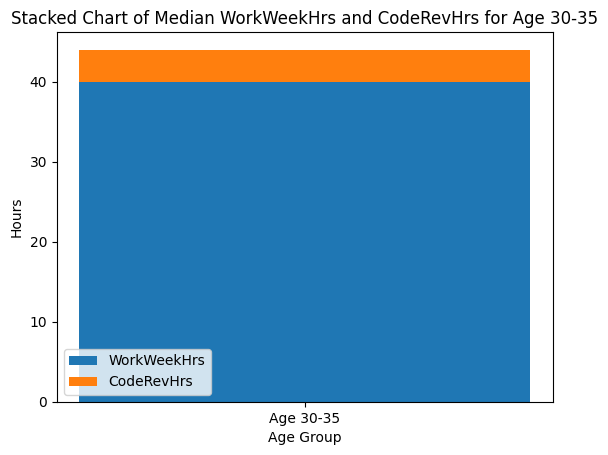

In [24]:
# Create a new DataFrame to retrieve values of all columns of df 
# where corresponding age is between 30-35
df_age_group = df[(df['Age'] >= 30) & (df['Age'] <= 35)]  

# calculate the median WorkWeekHrs and CodeRevHrs for the age group
median_WorkWeekHrs = df_age_group['WorkWeekHrs'].median()
median_CodeRevHrs = df_age_group['CodeRevHrs'].median()

# Stacked chart
plt.bar(['Age 30-35'], [median_WorkWeekHrs], label='WorkWeekHrs')
plt.bar(['Age 30-35'], [median_CodeRevHrs], bottom=[median_WorkWeekHrs], label='CodeRevHrs')

plt.xlabel('Age Group')
plt.ylabel('Hours')
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age 30-35')
plt.legend()
plt.show()


## Visualizing comparison of data


### Line Chart


Line chart to show realtionship between median `ConvertedComp` for all ages from 45 to 60.


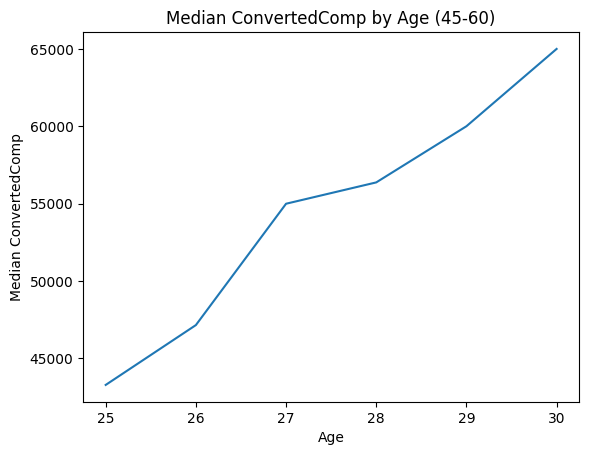

In [26]:
df_age_range = df[(df['Age'] >= 25) & (df['Age'] <= 30)]

# group the data by Age and calculate the median ConvertedComp
median_ConvertedComp_by_Age = df_age_range.groupby('Age')['ConvertedComp'].median()

# line chart depecting median ConvertedComp by Age
plt.plot(median_ConvertedComp_by_Age.index, median_ConvertedComp_by_Age.values)

plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp by Age (45-60)')
plt.show()

### Bar Chart


Horizontal bar chart using column `MainBranch.`


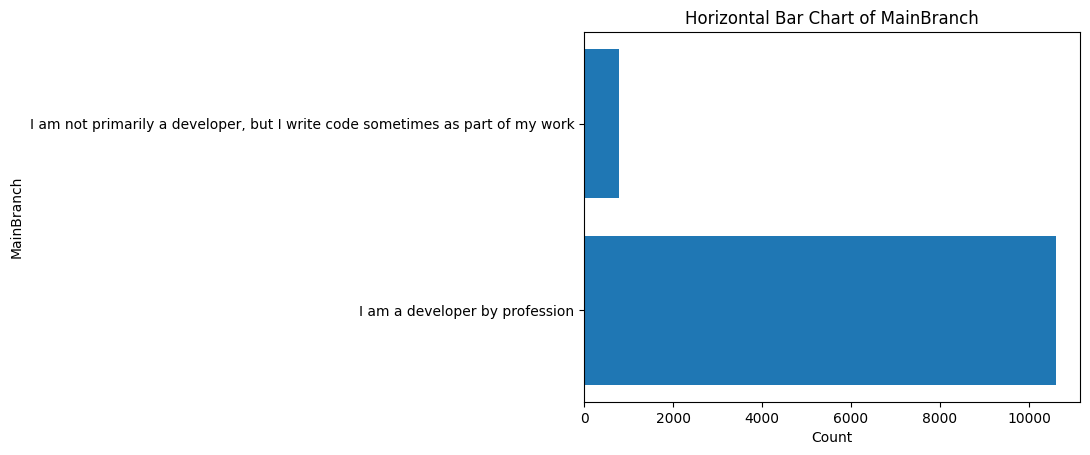

In [27]:
main_branch_counts = df['MainBranch'].value_counts() # Count of types of Main branch 

# horizontal bar chart
plt.barh(main_branch_counts.index, main_branch_counts.values)

plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Horizontal Bar Chart of MainBranch')
plt.show()


In [28]:
# close connection
conn.close() 

<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
